In [2]:
import numpy as np 
import pandas as pd

In [3]:
df=pd.read_csv('./datasets/Chennai_rent.csv')
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,3.0,BHK,Apartment,Ambattur,"17,000",1570.0,Semi-Furnished,2 bathrooms
1,OWNER,2.0,BHK,Apartment,Kelambakkam,"16,000",1402.0,Semi-Furnished,2 bathrooms
2,OWNER,2.0,BHK,Apartment,Adyar,"20,000",800.0,Semi-Furnished,2 bathrooms
3,OWNER,2.0,BHK,Apartment,Sembakkam,"14,000",1180.0,Unfurnished,2 bathrooms
4,OWNER,1.0,BHK,Independent House,Mogappair,"7,000",400.0,Unfurnished,1 bathrooms


In [4]:
df.drop(columns=['seller_type','layout_type','bathroom'],inplace=True)
df.head()

,bedroom,property_type,locality,price,area,furnish_type
0,3.0,Apartment,Ambattur,"17,000",1570.0,Semi-Furnished
1,2.0,Apartment,Kelambakkam,"16,000",1402.0,Semi-Furnished
2,2.0,Apartment,Adyar,"20,000",800.0,Semi-Furnished
3,2.0,Apartment,Sembakkam,"14,000",1180.0,Unfurnished
4,1.0,Independent House,Mogappair,"7,000",400.0,Unfurnished


In [5]:
df.shape

(9283, 6)

In [6]:
df.isnull().sum()

bedroom          483
property_type    483
locality         483
price            483
area             483
furnish_type     483
dtype: int64

In [7]:
df['price'] = df['price'].str.replace(r'[^\d.]+', '', regex=True)

In [8]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [9]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type
0,3.0,Apartment,Ambattur,17000.0,1570.0,Semi-Furnished
1,2.0,Apartment,Kelambakkam,16000.0,1402.0,Semi-Furnished
2,2.0,Apartment,Adyar,20000.0,800.0,Semi-Furnished
3,2.0,Apartment,Sembakkam,14000.0,1180.0,Unfurnished
4,1.0,Independent House,Mogappair,7000.0,400.0,Unfurnished


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9283 entries, 0 to 9282
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedroom        8800 non-null   float64
 1   property_type  8800 non-null   object 
 2   locality       8800 non-null   object 
 3   price          8800 non-null   float64
 4   area           8800 non-null   float64
 5   furnish_type   8800 non-null   object 
dtypes: float64(3), object(3)
memory usage: 435.3+ KB


In [11]:
df["house_price"] = (df["price"] * 12 * 100) / 3

In [12]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type,house_price
0,3.0,Apartment,Ambattur,17000.0,1570.0,Semi-Furnished,6800000.0
1,2.0,Apartment,Kelambakkam,16000.0,1402.0,Semi-Furnished,6400000.0
2,2.0,Apartment,Adyar,20000.0,800.0,Semi-Furnished,8000000.0
3,2.0,Apartment,Sembakkam,14000.0,1180.0,Unfurnished,5600000.0
4,1.0,Independent House,Mogappair,7000.0,400.0,Unfurnished,2800000.0


In [13]:
df.bedroom.value_counts()

bedroom
2.0     4200
3.0     2145
1.0     1970
4.0      382
5.0       67
6.0       20
10.0       6
8.0        4
7.0        4
9.0        2
Name: count, dtype: int64

In [14]:
df = df[df['bedroom'] <= 5]

In [15]:
df.property_type.value_counts()

property_type
Apartment            4918
Independent House    1966
Independent Floor    1307
Studio Apartment      349
Villa                 223
Penthouse               1
Name: count, dtype: int64

In [16]:
df["property_type"] = df["property_type"].replace("Studio Apartment", "Apartment")
df["property_type"] = df["property_type"].replace("Independent Floor", "Villa")
df["property_type"] = df["property_type"].replace("Penthouse", "Villa")

In [17]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type,house_price
0,3.0,Apartment,Ambattur,17000.0,1570.0,Semi-Furnished,6800000.0
1,2.0,Apartment,Kelambakkam,16000.0,1402.0,Semi-Furnished,6400000.0
2,2.0,Apartment,Adyar,20000.0,800.0,Semi-Furnished,8000000.0
3,2.0,Apartment,Sembakkam,14000.0,1180.0,Unfurnished,5600000.0
4,1.0,Independent House,Mogappair,7000.0,400.0,Unfurnished,2800000.0


In [18]:
df.locality.value_counts().describe()

count    401.000000
mean      21.855362
std       45.458377
min        1.000000
25%        1.000000
50%        4.000000
75%       26.000000
max      524.000000
Name: count, dtype: float64

In [19]:
locality_counts = df["locality"].value_counts()
df = df[df["locality"].isin(locality_counts[locality_counts >=10].index)]

In [20]:
df.locality.nunique()

140

In [21]:
df.shape

(8040, 7)

In [22]:
df.furnish_type.value_counts()

furnish_type
Semi-Furnished    5253
Unfurnished       1909
Furnished          878
Name: count, dtype: int64

In [23]:
df["furnish_type"] = df["furnish_type"].replace("Semi-Furnished", "Furnished")

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x800 with 0 Axes>

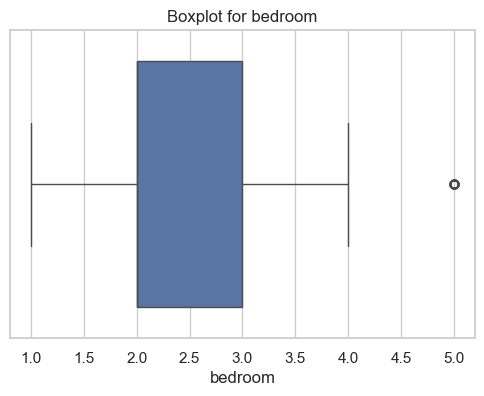

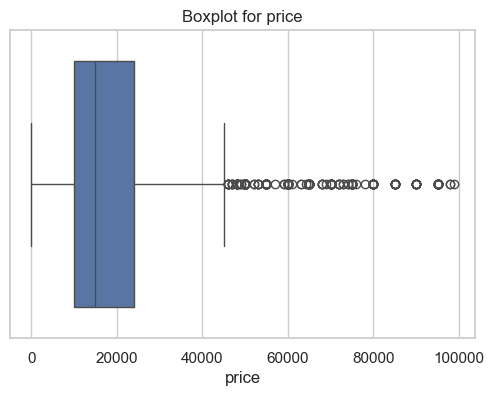

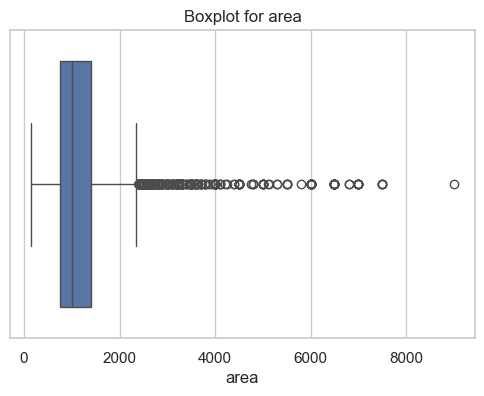

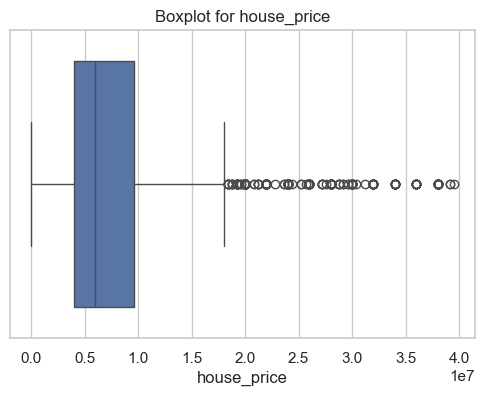

In [25]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

df_numeric = df.select_dtypes(include=['float64', 'int64'])  
for column in df_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [26]:
for column in df_numeric.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [27]:
df.shape

(6942, 7)

In [28]:
df.drop(columns=['price'],inplace=True)

In [29]:
df.rename(columns={'house_price': 'price'}, inplace=True)

In [30]:
df.head()

,bedroom,property_type,locality,area,furnish_type,price
0,3.0,Apartment,Ambattur,1570.0,Furnished,6800000.0
1,2.0,Apartment,Kelambakkam,1402.0,Furnished,6400000.0
2,2.0,Apartment,Adyar,800.0,Furnished,8000000.0
3,2.0,Apartment,Sembakkam,1180.0,Unfurnished,5600000.0
4,1.0,Independent House,Mogappair,400.0,Unfurnished,2800000.0


In [31]:
df = pd.get_dummies(df).astype(int)

In [32]:
df['price'] = df['price'] / 100000

In [33]:
df.head()

,bedroom,area,price,property_type_Apartment,property_type_Independent House,property_type_Villa,locality_Adambakam,locality_Adyar,locality_Alandur,locality_Alwarpet,...,locality_Vandalur,locality_Velachery,locality_Vengaivasal,locality_Villivakkam,locality_Virugambakkam,locality_West Mambalam,locality_West Tambaram,locality_tambaram west,furnish_type_Furnished,furnish_type_Unfurnished
0,3,1570,68.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1402,64.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,800,80.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,1180,56.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,400,28.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df.shape

(6942, 147)

In [35]:
df.columns = df.columns.str.lower()

In [36]:
df.head()

,bedroom,area,price,property_type_apartment,property_type_independent house,property_type_villa,locality_adambakam,locality_adyar,locality_alandur,locality_alwarpet,...,locality_vandalur,locality_velachery,locality_vengaivasal,locality_villivakkam,locality_virugambakkam,locality_west mambalam,locality_west tambaram,locality_tambaram west,furnish_type_furnished,furnish_type_unfurnished
0,3,1570,68.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1402,64.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,800,80.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,1180,56.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,400,28.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
target=df.price
df.drop(columns=['price'],inplace=True)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,target,test_size=0.2,random_state=10)

In [39]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.671812369025085

In [40]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), df,target, cv=cv)

array([0.70827847, 0.72429051, 0.6916423 , 0.71716361, 0.73594937])

In [41]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 10],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridsearchcv(df,target)

,model,best_score,best_params
0,linear_regression,0.715465,{'fit_intercept': True}
1,lasso,0.630244,"{'alpha': 0.1, 'selection': 'cyclic'}"
2,decision_tree,0.726385,"{'criterion': 'squared_error', 'splitter': 'be..."


In [42]:
model=DecisionTreeRegressor(criterion= 'friedman_mse',splitter='random')
model.fit(df,target)
model.score(X_test, y_test)

0.9719141286101153

In [43]:
import pickle
with open('Chennai_model.pickle','wb') as f:
    pickle.dump(model,f)

In [44]:
import json
columns = {
    'data_columns' : [col.lower() for col in df.columns]
}
with open("Chennai_columns.json","w") as f:
    f.write(json.dumps(columns))